In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
# load the dataset
data = pd.read_csv('admit_data2.csv')

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
# Define the input and output data
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
# predict the test results
y_pred = regressor.predict(X_test)
y_pred

array([0.65574435, 0.73430228, 0.90436809, 0.82259969, 0.55788233,
       0.91160429, 0.54264953, 0.52628146, 0.66340936, 0.81851662,
       0.68593422, 0.93401326, 0.53815533, 0.86728918, 0.69609912,
       0.65125774, 0.67311052, 0.51406476, 0.69792256, 1.00910305,
       0.55736174, 0.62087043, 0.74014935, 0.53946085, 0.91009173,
       0.83559979, 0.67767011, 0.56291224, 0.68639694, 0.78926028,
       0.83817553, 0.95031015, 0.66204304, 0.48865961, 0.66414965,
       0.64822431, 0.70045985, 0.673208  , 0.60509982, 0.85898307,
       0.77063988, 0.58089016, 0.75263348, 0.93347497, 0.83261751,
       0.86772458, 0.93092666, 0.63943982, 0.89463172, 0.85382072,
       0.872162  , 0.75161614, 0.82011878, 0.9320531 , 0.60990902,
       0.56969517, 0.68880011, 0.83945734, 0.56622967, 0.84683954,
       0.65260813, 0.66365908, 0.72015857, 0.48817044, 0.6102768 ,
       0.68964218, 0.64532972, 0.85752904, 0.89112601, 0.77430894,
       0.74441559, 0.79456207, 0.84202392, 0.80971924, 0.55237

In [8]:
# calculate R-squared
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8212241793299232


In [9]:
# predict Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.004616592264723946


In [10]:
# predict Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.04994339166543273


In [11]:
# predict Root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.06794550952582477


In [12]:
# function for precision at k
def precision_at_k(y_test, y_pred, k):

    # sort the prediction values by probability in descending order
    sorted_pred_values = np.argsort(y_pred)[::-1] 

    # select the top k sorted prediction values
    top_k_sorted_pred_values = sorted_pred_values[:k]

    # precision at k
    true_positives = np.sum(y_test[top_k_sorted_pred_values])
    precision_at_k = true_positives / k

    return precision_at_k

# precision at k=5
precision_at_5 = precision_at_k(y_test, y_pred, k=5)
print("precision_at_k=5: ", precision_at_5)

precision_at_k=5:  0.942


ValueError: x and y must be the same size

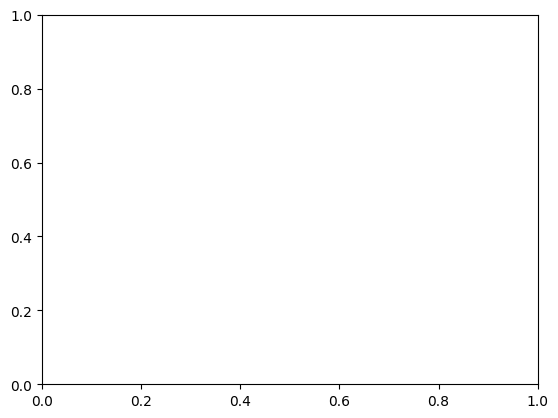

In [13]:
# visualize the performance of the model
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression (R-squared = {:.2f})'.format(r2))
plt.show()